## Import libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Read dataset

In [12]:
# Data loader function (from preprocessing notebook)
def data_loader(path='https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv',
                preprocessing=False):
    df = pd.read_csv(path)
    if preprocessing == True:
        df['date'] = pd.to_datetime(df['date'])
        df['department'] = df['department'].apply(lambda x: 'sewing' if x == 'sweing' else 'finishing')
        df['team'] = df['team'].apply(lambda x: 'Team'+str(int(x)))
        from sklearn.impute import KNNImputer
        imputer = KNNImputer()
        df[df.columns[5:]] = imputer.fit_transform(df.iloc[:,5:])
    return df

In [13]:
df = data_loader(preprocessing=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   object        
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   float64       
 9   incentive              1197 non-null   float64       
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   float64       
 12  no_of_style_change     1197 non-null   float64       
 13  no_

## Descriptive statistics

Thống kê mô tả biến kiểu số.

In [15]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,1197.0,1069.041771,1414.802853,7.000000,773.400000,983.000000,1119.000000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000
actual_productivity,1197.0,0.735091,0.174488,0.233705,0.650307,0.773333,0.850253,1.120437


Thống kê mô tả biến kiểu phân loại.

In [16]:
df.describe(include='O').T

,count,unique,top,freq
quarter,1197,5,Quarter1,360
department,1197,2,sewing,691
day,1197,6,Wednesday,208
team,1197,12,Team8,109


Khảo sát biến phụ thuộc.

In [26]:
print('Mean',df['actual_productivity'].mean())
print('Variance:',df['actual_productivity'].var())
print('Skewness:',df['actual_productivity'].skew())
print('Kurtosis:',df['actual_productivity'].kurt())

Mean 0.7350910969791145
Variance: 0.03044602847110404
Skewness: -0.8074917745097576
Kurtosis: 0.33322734124329134


Skewness < 0 $\Rightarrow$ biến lệch trái.<br>
Kurtosis < 3 $\Rightarrow$ biến có đỉnh thấp hơn phân phối chuẩn, ít bị ảnh hưởng của giá trị ngoại lệ.

<AxesSubplot: xlabel='actual_productivity', ylabel='Density'>

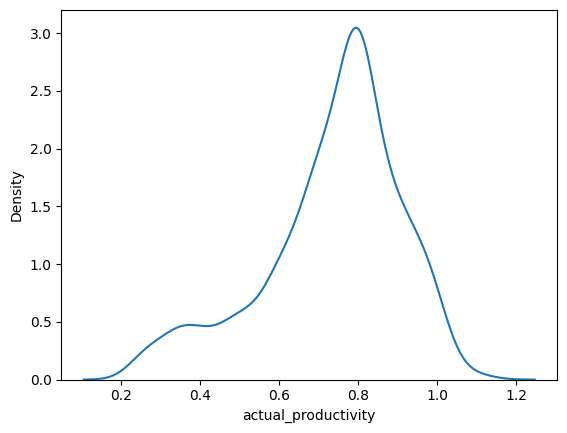

In [20]:
sns.kdeplot(data=df, x='actual_productivity')

<AxesSubplot: xlabel='actual_productivity'>

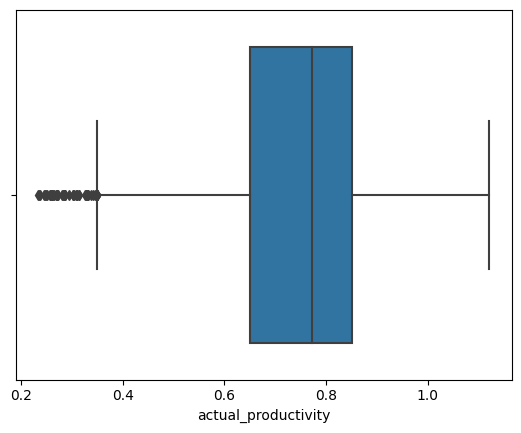

In [28]:
sns.boxplot(data=df,x='actual_productivity')

Boxplot cho thấy có nhiều giá trị ngoại lệ thấp.

## Correlations of numerical features

In [44]:
numerical_features = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
                    'no_of_style_change', 'no_of_workers', 'actual_productivity']
categorical_features = ['quarter', 'department', 'day', 'team']

In [45]:
df[numerical_features].corr()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
targeted_productivity,1.000000,-0.069489,0.035156,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.069489,1.000000,0.069815,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,0.035156,0.069815,1.000000,0.087760,0.054190,-0.020977,-0.038130,-0.037880,0.106235,0.074306
over_time,-0.088557,0.674887,0.087760,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,0.032768,0.032629,0.054190,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,-0.056181,0.056863,-0.020977,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,-0.053818,0.105901,-0.038130,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.209294,0.315388,-0.037880,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.084288,0.912176,0.106235,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991
actual_productivity,0.421594,-0.122089,0.074306,-0.054206,0.076538,-0.080851,-0.181734,-0.207366,-0.057991,1.000000


<AxesSubplot: >

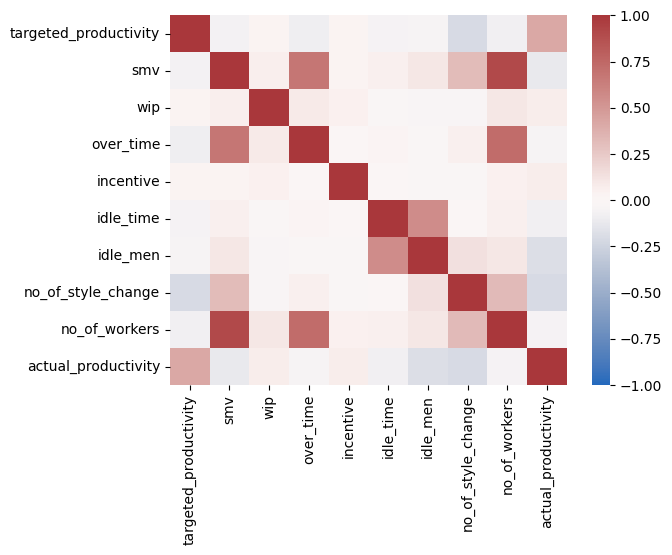

In [46]:
sns.heatmap(df[numerical_features].corr(), cmap=sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)

Biểu đồ heatmap cho thấy các biến kiểu số hầu như không có tương quan nào rõ rệt với biến 'actual_productivity', ngoại trừ biến 'targeted_productivity' có tương quan yếu.

In [37]:
stats.pearsonr(df['actual_productivity'],df['targeted_productivity'])

PearsonRResult(statistic=0.42159388370015033, pvalue=8.997899153176313e-53)

Mức độ tin cậy của tương quan là chắc chắn (p_value < 0.001).

<AxesSubplot: xlabel='targeted_productivity', ylabel='actual_productivity'>

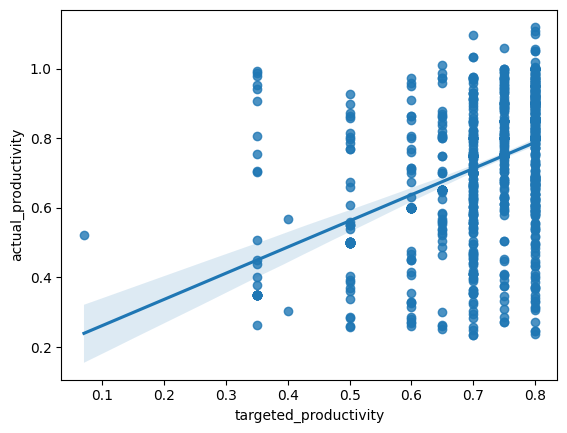

In [43]:
sns.regplot(data=df, x='targeted_productivity', y='actual_productivity')

Xét các tương quan khác.

In [47]:
cond = abs(df[numerical_features].corr()) >= 0.3
df[numerical_features].corr()[cond]

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
targeted_productivity,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421594
smv,NaN,1.000000,NaN,0.674887,NaN,NaN,NaN,0.315388,0.912176,NaN
wip,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
over_time,NaN,0.674887,NaN,1.000000,NaN,NaN,NaN,NaN,0.734164,NaN
incentive,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
idle_time,NaN,NaN,NaN,NaN,NaN,1.000000,0.559146,NaN,NaN,NaN
idle_men,NaN,NaN,NaN,NaN,NaN,0.559146,1.000000,NaN,NaN,NaN
no_of_style_change,NaN,0.315388,NaN,NaN,NaN,NaN,NaN,1.000000,0.327787,NaN
no_of_workers,NaN,0.912176,NaN,0.734164,NaN,NaN,NaN,0.327787,1.000000,NaN
actual_productivity,0.421594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


Thử giải thích các mối liên hệ: <br>
- smv vs. over_time: thời gian hoàn thành một tác vụ lớn có thể do tác vụ đó đòi hỏi vận hành phức tạp, dẫn tới có thể làm việc overtime mới hoàn thành được (tương quan thuận).
- smv vs. no_of_style_change: khi có thay đổi về quy cách và số lượng thay đổi nhiều thì dẫn đến thời gian hoàn thành tác vụ tăng (tương quan thuận), có thể do sự thay đổi làm các công nhân phải có giai đoạn thích nghi.
- smv vs. no_of_workers: thời gian hoàn thành một tác vụ lớn có thể do tác vụ đó đòi hỏi vận hành phức tạp, do đó cần nhiuề công nhân để hoàn thành được (tương quan thuận).
- over_time vs. no_of_workers: bắc cầu từ tương quan với smv (tương quan thuận).
- no_of_style_change vs. no_of_workers: bắc cầu từ tương quan với smv (tương quan thuận).
- idle_time vs. idle_men: idle_time xuất hiện khi quá trình sản xuất gặp một sự cố nào đó và bị gián đoạn phát sinh thời gian rảnh, và do đó các công nhân cũng rảnh theo.

## Effects of categorical features

In [48]:
categorical_features

['quarter', 'department', 'day', 'team']

Xét ảnh hưởng của 'quarter' đến 'actual_productivity'.

In [51]:
df['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

<AxesSubplot: ylabel='quarter'>

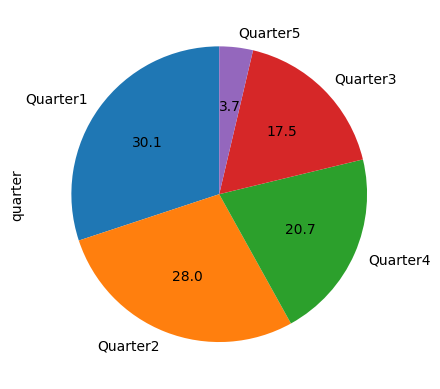

In [81]:
df['quarter'].value_counts().plot(kind='pie',startangle=90,autopct='%.1f')

<AxesSubplot: xlabel='quarter', ylabel='actual_productivity'>

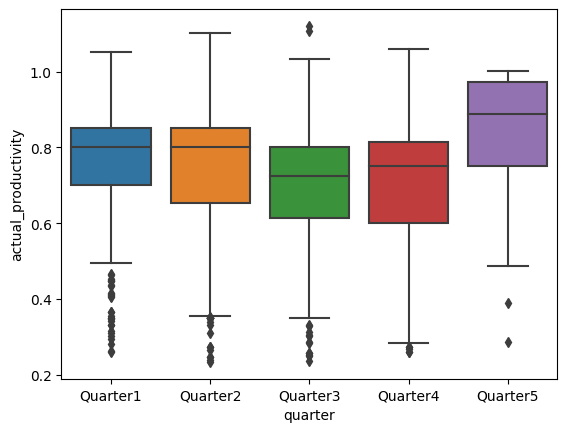

In [49]:
sns.boxplot(data=df,x='quarter',y='actual_productivity')

In [54]:
stats.f_oneway(df['actual_productivity'][df['quarter'] == 'Quarter1'],
               df['actual_productivity'][df['quarter'] == 'Quarter2'],
               df['actual_productivity'][df['quarter'] == 'Quarter3'],
               df['actual_productivity'][df['quarter'] == 'Quarter4'],
               df['actual_productivity'][df['quarter'] == 'Quarter5'])

F_onewayResult(statistic=7.11173497585018, pvalue=1.170397659389911e-05)

Biến 'quarter' có ảnh hưởng đến biến 'actual_productivity' (p_value < 0.05).

Xét ảnh hưởng của 'department' đến 'actual_productivity'.

In [56]:
df['department'].unique()

array(['sewing', 'finishing'], dtype=object)

<AxesSubplot: ylabel='department'>

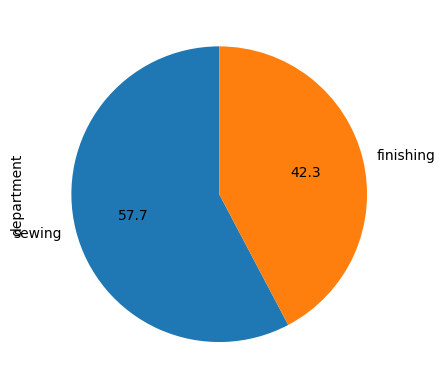

In [82]:
df['department'].value_counts().plot(kind='pie',startangle=90,autopct='%.1f')

<AxesSubplot: xlabel='department', ylabel='actual_productivity'>

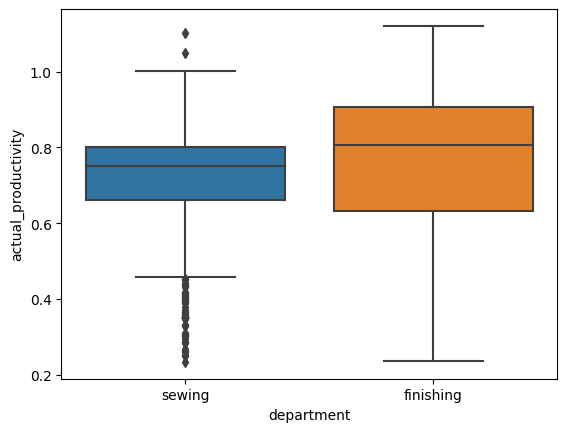

In [57]:
sns.boxplot(data=df,x='department',y='actual_productivity')

In [58]:
stats.f_oneway(df['actual_productivity'][df['department'] == 'sewing'],
               df['actual_productivity'][df['department'] == 'finishing'])

F_onewayResult(statistic=9.246175421332591, pvalue=0.002411259977623153)

Biến 'department' có ảnh hưởng đến biến 'actual_productivity' (p_value < 0.05).

Xét ảnh hưởng của 'day' đến 'actual_productivity'.

In [59]:
df['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

<AxesSubplot: ylabel='day'>

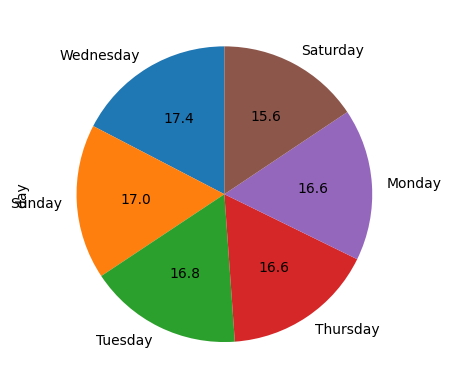

In [83]:
df['day'].value_counts().plot(kind='pie',startangle=90,autopct='%.1f')

<AxesSubplot: xlabel='day', ylabel='actual_productivity'>

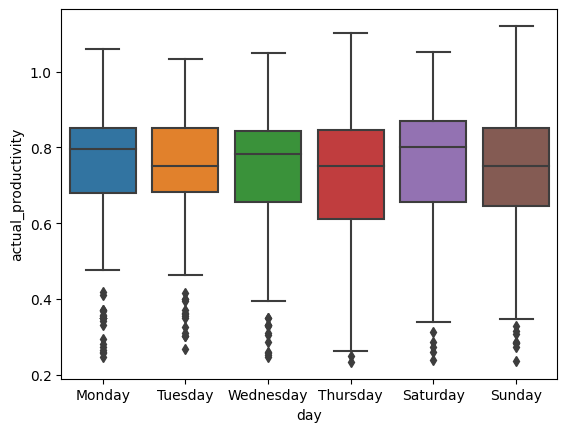

In [60]:
sns.boxplot(data=df,x='day',y='actual_productivity',order=['Monday','Tuesday','Wednesday','Thursday','Saturday','Sunday'])

In [62]:
stats.f_oneway(df['actual_productivity'][df['day'] == 'Monday'],
               df['actual_productivity'][df['day'] == 'Tuesday'],
               df['actual_productivity'][df['day'] == 'Wednesday'],
               df['actual_productivity'][df['day'] == 'Thursday'],
               df['actual_productivity'][df['day'] == 'Saturday'],
               df['actual_productivity'][df['day'] == 'Sunday'])

F_onewayResult(statistic=0.7121012009422417, pvalue=0.614378842438619)

Biến 'day' không ảnh hưởng đến biến 'actual_productivity' (p_value > 0.05).

Xét ảnh hưởng của 'team' đến 'actual_productivity'.

In [63]:
df['team'].unique()

array(['Team8', 'Team1', 'Team11', 'Team12', 'Team6', 'Team7', 'Team2',
       'Team3', 'Team9', 'Team10', 'Team5', 'Team4'], dtype=object)

<AxesSubplot: ylabel='team'>

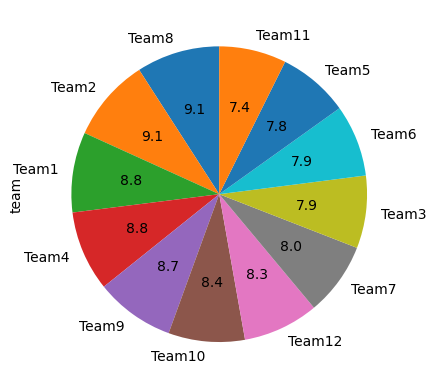

In [84]:
df['team'].value_counts().plot(kind='pie',startangle=90,autopct='%.1f')

<AxesSubplot: xlabel='team', ylabel='actual_productivity'>

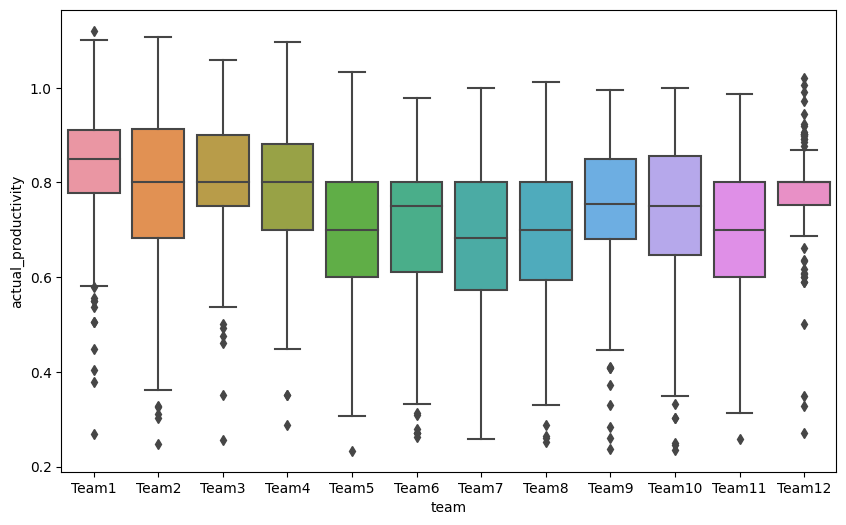

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='team',y='actual_productivity',order=['Team'+str(i) for i in range(1,13)])

In [72]:
stats.f_oneway(df['actual_productivity'][df['team'] == 'Team1'],
               df['actual_productivity'][df['team'] == 'Team2'],
               df['actual_productivity'][df['team'] == 'Team3'],
               df['actual_productivity'][df['team'] == 'Team4'],
               df['actual_productivity'][df['team'] == 'Team5'],
               df['actual_productivity'][df['team'] == 'Team6'],
               df['actual_productivity'][df['team'] == 'Team7'],
               df['actual_productivity'][df['team'] == 'Team8'],
               df['actual_productivity'][df['team'] == 'Team9'],
               df['actual_productivity'][df['team'] == 'Team10'],
               df['actual_productivity'][df['team'] == 'Team11'],
               df['actual_productivity'][df['team'] == 'Team12'])

F_onewayResult(statistic=10.213784537959581, pvalue=5.164908070183416e-18)

Biến 'team' có ảnh hưởng đến biến 'actual_productivity' (p_value < 0.05).